In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# 目標是只看頂級房價的預測因子

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston = pd.DataFrame(boston_dataset.data,
                     columns = boston_dataset.feature_names)

In [6]:
boston['MEDV'] = boston_dataset.target

# 看一下資料

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 只想看頂級房價

In [8]:
MEDV_sort = boston.sort_values('MEDV', ascending = False)

In [9]:
MEDV_sort.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


# 計算房價平均數與標準差，以超過平均數一點個標準差為極端值切分點

In [10]:
np.mean(boston.MEDV)

22.532806324110698

In [11]:
np.std(boston.MEDV)

9.188011545278206

In [12]:
cut = np.mean(boston.MEDV) + 1.5*np.std(boston.MEDV)
cut

36.314823642028

In [13]:
NewData = MEDV_sort.drop(MEDV_sort[MEDV_sort.MEDV < cut].index)

In [14]:
NewData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


## 看一下相關表

In [15]:
NewData.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.34,0.73,0.44,0.61,-0.65,0.50,-0.55,0.92,0.91,0.55,-0.63,0.37,0.41
ZN,-0.34,1.00,-0.47,-0.09,-0.60,0.09,-0.69,0.68,-0.36,-0.34,-0.36,0.36,-0.23,-0.03
INDUS,0.73,-0.47,1.00,0.45,0.68,-0.43,0.63,-0.59,0.63,0.80,0.31,-0.65,-0.02,0.42
CHAS,0.44,-0.09,0.45,1.00,0.24,-0.16,0.21,-0.19,0.38,0.41,0.13,-0.20,-0.12,0.39
NOX,0.61,-0.60,0.68,0.24,1.00,-0.29,0.82,-0.86,0.55,0.57,-0.01,-0.53,0.42,0.35
RM,-0.65,0.09,-0.43,-0.16,-0.29,1.00,-0.18,0.27,-0.64,-0.65,-0.47,0.47,-0.25,0.08
AGE,0.50,-0.69,0.63,0.21,0.82,-0.18,1.00,-0.88,0.44,0.43,0.12,-0.41,0.32,0.23
DIS,-0.55,0.68,-0.59,-0.19,-0.86,0.27,-0.88,1.00,-0.48,-0.44,-0.14,0.44,-0.39,-0.31
RAD,0.92,-0.36,0.63,0.38,0.55,-0.64,0.44,-0.48,1.00,0.90,0.64,-0.58,0.25,0.37
TAX,0.91,-0.34,0.80,0.41,0.57,-0.65,0.43,-0.44,0.90,1.00,0.52,-0.62,0.13,0.33


## 準備訓練資料

# drop一些資料 相關0.3為切分點

In [16]:
NewData.drop(['ZN', 'RM', 'AGE', 'PTRATIO', 'RAD', 'TAX', 'LSTAT', 'CHAS', 'INDUS' ], axis = 1, inplace = True)
NewData

,CRIM,NOX,DIS,B,MEDV
283,0.01501,0.4010,5.8850,395.52,50.0
225,0.52693,0.5040,2.8944,382.00,50.0
369,5.66998,0.6310,1.3567,375.33,50.0
370,6.53876,0.6310,1.2024,392.05,50.0
371,9.23230,0.6310,1.1691,366.15,50.0
372,8.26725,0.6680,1.1296,347.88,50.0
186,0.05602,0.4880,3.1992,392.63,50.0
204,0.02009,0.4161,5.1180,390.55,50.0
257,0.61154,0.6470,1.8010,389.70,50.0
195,0.01381,0.4220,5.6484,394.23,50.0


In [53]:
X = NewData.loc[:, "CRIM": "B"].values 
Y =NewData.MEDV

In [54]:
len(NewData)

40

# 拆資料

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

## step. 開函數學習機

In [59]:
model = LinearRegression()

# step 2. 學習（訓練）

In [60]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# step 3 預測

In [61]:
y_predict = model.predict(x_test)

In [62]:
sns.set() 

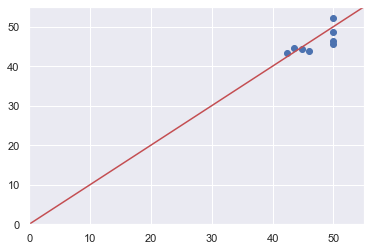

In [63]:
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0, 55], [0, 55], 'r')

# 頂級的房價只跟 CRIM, NOX,DIS和B四項有關